GradientBoostedTrees to predict popularity

In [28]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV

In [29]:
df = pd.read_csv('project_preprocess.csv')
df.head()

,day_elapse,achievements,average_playtime,median_playtime,price,positive_percentage,english_0,english_1,required_age_0,required_age_3,...,tag_Western,tag_Word Game,tag_World War I,tag_World War II,tag_Wrestling,tag_Zombies,tag_e-sports,popularity,positive_ratings,negative_ratings
0,-7.584710,-0.128306,9.557829,0.072624,0.141186,1.110537,0,1,1,0,...,0,0,0,0,0,0,0,Popular,124534,3339
1,-8.329745,-0.128306,0.069619,-0.035710,-0.265175,0.536451,0,1,1,0,...,0,0,0,0,0,0,0,Popular,3318,633
2,-6.414491,-0.128306,0.020358,-0.047606,-0.265175,0.775589,0,1,1,0,...,0,0,0,1,0,0,0,Popular,3416,398
3,-7.312387,-0.128306,0.059220,0.016120,-0.265175,0.480095,0,1,1,0,...,0,0,0,0,0,0,0,Popular,1273,267
4,-8.054853,-0.128306,0.259548,0.114258,-0.265175,0.999691,0,1,1,0,...,0,0,0,0,0,0,0,Popular,5250,288


In [30]:
(df_train,df_test) = train_test_split(df,train_size=0.8,test_size=0.2,random_state=0)

In [31]:
df_train['popularity'].value_counts()['Average']

3818

In [32]:
to_remove = df_train['popularity'].value_counts()['Low popularity'] - df_train['popularity'].value_counts()['Average']
drops = []

for index, row in df_train.iterrows():
    if to_remove <=0:
        break
    if row['popularity'] == 'Low popularity':
        drops.append(index)
        to_remove -= 1

In [33]:
df_train = df_train.drop(drops)
df_train['popularity'].value_counts()

Average           3818
Low popularity    3818
Popular           2992
Name: popularity, dtype: int64

In [34]:
X_train = df_train.drop('popularity', axis = 1).drop('positive_ratings', axis = 1)
y_train = df_train['popularity']
X_test = df_test.drop('popularity', axis = 1).drop('positive_ratings', axis = 1)
y_test = df_test['popularity']

In [35]:
X_train.head()

,day_elapse,achievements,average_playtime,median_playtime,price,positive_percentage,english_0,english_1,required_age_0,required_age_3,...,tag_Web Publishing,tag_Werewolves,tag_Western,tag_Word Game,tag_World War I,tag_World War II,tag_Wrestling,tag_Zombies,tag_e-sports,negative_ratings
121,-4.734309,-0.046075,6.717113,0.734522,0.115788,1.037266,0,1,1,0,...,0,0,0,0,0,0,0,0,0,16433
2092,-0.992435,-0.077266,-0.081995,-0.062050,3.036506,-0.374186,0,1,1,0,...,0,0,0,0,0,0,0,0,0,135
20150,1.046134,-0.003541,0.669509,0.921451,3.671445,0.067336,0,1,1,0,...,0,0,0,0,0,0,0,0,0,978
5063,0.093003,-0.077266,0.076188,0.060728,-0.671536,0.436015,0,1,1,0,...,0,0,0,0,0,0,0,0,0,9
3818,-0.771494,-0.094279,-0.081995,-0.062050,0.115788,-0.248405,0,1,1,0,...,0,0,0,0,0,0,0,0,0,370


In [36]:
y_train.head()

121      Popular
2092     Average
20150    Popular
5063     Average
3818     Average
Name: popularity, dtype: object

In [37]:
tr = GradientBoostingClassifier()
tr.fit(X_train, y_train)

GradientBoostingClassifier()

In [38]:
tr.score(X_test, y_test).round(3)

0.861

Baseline was: 0.687

In [39]:
tr = GradientBoostingClassifier()
grid = {'n_estimators':[10,100,200], 'max_depth' : [1,5,10], 'learning_rate':[.1,.05]}
grid_search = GridSearchCV(tr, param_grid = grid, return_train_score = True, n_jobs=-1)

grid_search.fit(X_train,y_train)

GridSearchCV(estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.05], 'max_depth': [1, 5, 10],
                         'n_estimators': [10, 100, 200]},
             return_train_score=True)

In [40]:
print('         best B =',grid_search.best_params_)
print('  validation R2 =',grid_search.best_score_.round(3))

         best B = {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 200}
  validation R2 = 0.839


In [41]:
test_score = grid_search.best_estimator_.score(X_test, y_test).round(3)
test_score

0.866

Baseline was: 0.687

In [42]:
from sklearn.metrics import confusion_matrix

In [43]:
yh = grid_search.predict(X_test)

In [44]:
y = y_test.astype('category')
cols = y.cat.categories
M = confusion_matrix(y, yh)
ConfusionMatrix = pd.DataFrame(M, index=cols, columns=cols)
ConfusionMatrix['total'] = ConfusionMatrix.sum(axis=1)
ConfusionMatrix

,Average,Low popularity,Popular,total
Average,753,93,90,936
Low popularity,439,3305,2,3746
Popular,102,0,631,733


This estimator is able to accurately predict Average!

In [66]:
features_importance = pd.Series(grid_search.best_estimator_.feature_importances_,index=X_train.columns)

In [67]:
import matplotlib.pyplot as plt

In [71]:
features_importance.sort_values(ascending=False)

negative_ratings       0.506367
day_elapse             0.089606
positive_percentage    0.076427
median_playtime        0.073050
price                  0.051955
                         ...   
tag_Skating            0.000000
tag_Moddable           0.000000
tag_Motocross          0.000000
Tutorial               0.000000
tag_Blood              0.000000
Length: 415, dtype: float64

<AxesSubplot:>

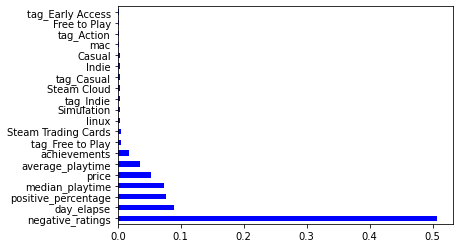

In [76]:
features_importance.sort_values(ascending=False).head(20).plot.barh(color='blue')